<a href="https://colab.research.google.com/github/ssnirgudkar/UNet/blob/main/maskr_cnn_inference_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is to use Mask R CNN to infer our images. It uses weights from coco dataset

1. used coco mask r-cnn weights, to infer IR images - it works, gives boxes, + mask for the IR images. However, only identifies boat as that is the only class
2. Saved the unet model weights in h5 format, then used these weights instead of coco mask rcnn weights to see what happens. it doesnt work. gives some obstacles, but not correct. which means we will have to train mask r-cnn with our images - problem is they only are masked, do not have bounding boxes

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
!pip install numpy scipy
!pip install pillow scikit-image matplotlib imutils
!pip install "IPython[all]"
!pip install tensorflow-gpu # or tensorflow-gpu
!pip install keras h5py

In [3]:
!pip install opencv-contrib-python

In [4]:
!git clone https://github.com/matterport/Mask_RCNN.git


Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 22.74 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [5]:
cd Mask_RCNN

/content/Mask_RCNN


In [ ]:
!sudo python setup.py install

In [ ]:
pip show mask-rcnn

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

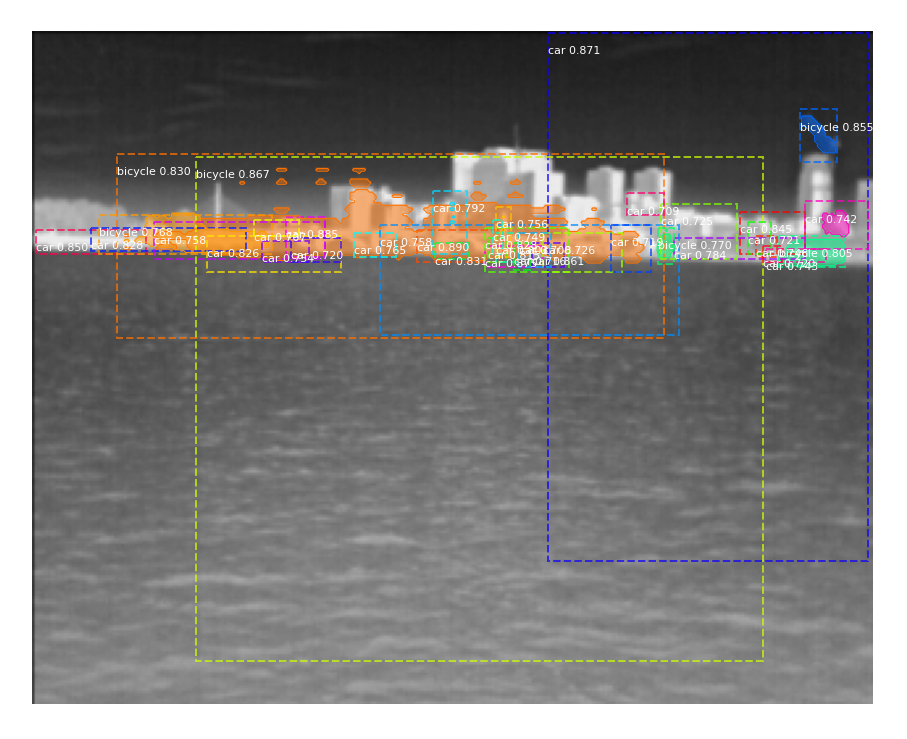

In [15]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
 
# define 81 classes that the coco model knowns about

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 3
 
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights. if you don't add exclude, you get error on dimension when we use coco weights
rcnn.load_weights('/content/drive/MyDrive/Models/mask_rcnn_coco.h5', by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
#rcnn.load_weights('/content/drive/MyDrive/Models/h5model_unet1-0.h5', by_name=True)
# load photograph
img = load_img('/content/drive/MyDrive/IRImageTrainingDataset/ir_train_images_resized_colored_291_images/1571161378.948094_resized_color.png')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])